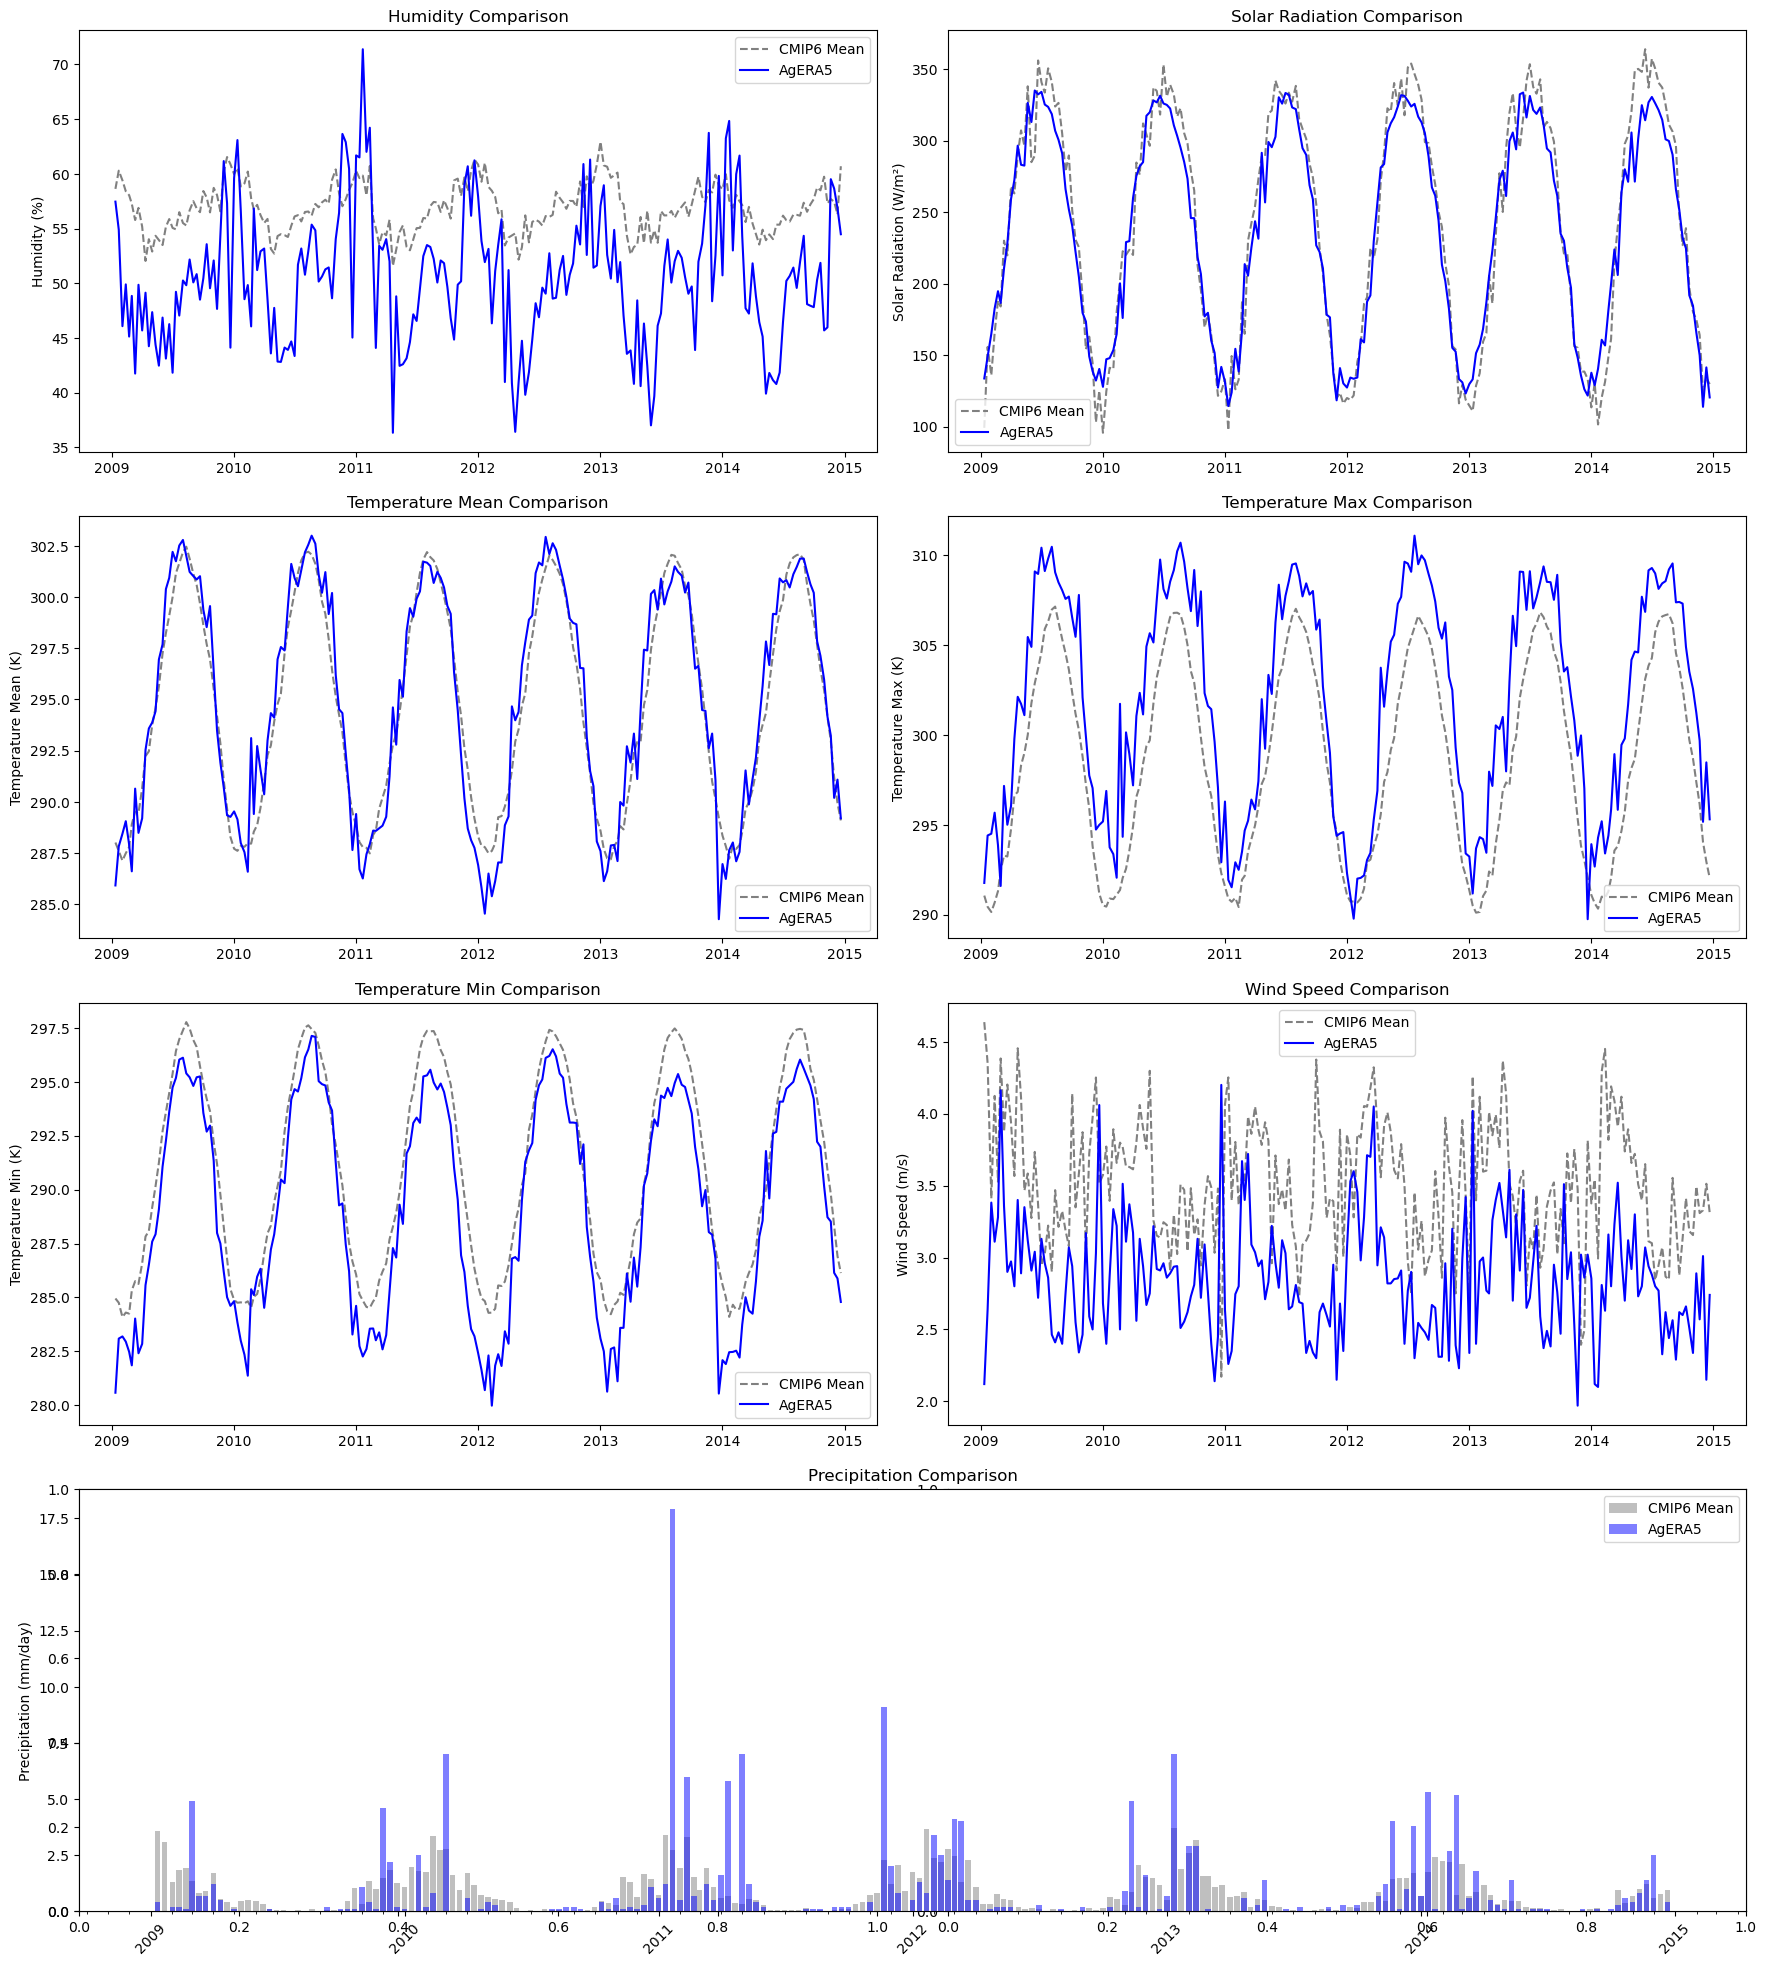

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Importing for better date formatting

# Load your data files with the provided paths
cmip6_humidity = pd.read_csv(r'D:\Thesis Work\charts\Humidity_climate_data.csv').apply(pd.to_numeric, errors='coerce').dropna(how='all')
cmip6_solar_radiation = pd.read_csv(r'D:\Thesis Work\charts\Solar Radiation_climate_data.csv').apply(pd.to_numeric, errors='coerce').dropna(how='all')
cmip6_temp_mean = pd.read_csv(r'D:\Thesis Work\charts\Temperature Mean_climate_data.csv').apply(pd.to_numeric, errors='coerce').dropna(how='all')
cmip6_temp_max = pd.read_csv(r'D:\Thesis Work\charts\Temperature Max_climate_data.csv').apply(pd.to_numeric, errors='coerce').dropna(how='all')
cmip6_temp_min = pd.read_csv(r'D:\Thesis Work\charts\Temperature Min_climate_data.csv').apply(pd.to_numeric, errors='coerce').dropna(how='all')
cmip6_wind_speed = pd.read_csv(r'D:\Thesis Work\charts\Wind Speed_climate_data.csv').apply(pd.to_numeric, errors='coerce').dropna(how='all')
cmip6_precipitation = pd.read_csv(r'D:\Thesis Work\charts\Precipitation_climate_data.csv').apply(pd.to_numeric, errors='coerce').dropna(how='all')


# Load AgERA5 data from the Excel file
agera5_data = pd.read_excel(r'D:\Thesis Work\charts\AgERA5.xlsx')

# Load the date file
dates = pd.to_datetime(pd.read_csv(r'D:\Thesis Work\charts\Date_climate_data.csv')['Unnamed: 0'])

# Ensure matching lengths by trimming dates and other datasets
min_length = min(len(agera5_data), len(dates))
trimmed_dates = dates[:min_length]

# Prepare AgERA5 data for plotting (assume the columns match variables)
agera5_humidity = pd.to_numeric(agera5_data['Humidity'], errors='coerce').dropna()[:min_length]
agera5_solar_radiation = pd.to_numeric(agera5_data['Solar Radiation'], errors='coerce').dropna()[:min_length]
agera5_temp_mean = pd.to_numeric(agera5_data['Temperature Mean'], errors='coerce').dropna()[:min_length]
agera5_temp_max = pd.to_numeric(agera5_data['Temperature Max'], errors='coerce').dropna()[:min_length]
agera5_temp_min = pd.to_numeric(agera5_data['Temperature Min'], errors='coerce').dropna()[:min_length]
agera5_wind_speed = pd.to_numeric(agera5_data['Wind Speed'], errors='coerce').dropna()[:min_length]
agera5_precipitation = pd.to_numeric(agera5_data['Precipitation'], errors='coerce').dropna()[:min_length]

# Create subplots with 2 charts per row (4 rows total for 8 variables)
fig, axs = plt.subplots(4, 2, figsize=(18, 20))

# Plotting each variable (left to right, top to bottom)

# Humidity
axs[0, 0].plot(trimmed_dates, cmip6_humidity.mean(axis=1), label='CMIP6 Mean', linestyle='--', color='gray')
axs[0, 0].plot(trimmed_dates, agera5_humidity, label='AgERA5', color='blue')
axs[0, 0].set_title('Humidity Comparison')
axs[0, 0].set_ylabel('Humidity (%)')
axs[0, 0].legend()

# Solar Radiation
axs[0, 1].plot(trimmed_dates, cmip6_solar_radiation.mean(axis=1), label='CMIP6 Mean', linestyle='--', color='gray')
axs[0, 1].plot(trimmed_dates, agera5_solar_radiation, label='AgERA5', color='blue')
axs[0, 1].set_title('Solar Radiation Comparison')
axs[0, 1].set_ylabel('Solar Radiation (W/m²)')
axs[0, 1].legend()

# Temperature Mean
axs[1, 0].plot(trimmed_dates, cmip6_temp_mean.mean(axis=1), label='CMIP6 Mean', linestyle='--', color='gray')
axs[1, 0].plot(trimmed_dates, agera5_temp_mean, label='AgERA5', color='blue')
axs[1, 0].set_title('Temperature Mean Comparison')
axs[1, 0].set_ylabel('Temperature Mean (K)')
axs[1, 0].legend()

# Temperature Max
axs[1, 1].plot(trimmed_dates, cmip6_temp_max.mean(axis=1), label='CMIP6 Mean', linestyle='--', color='gray')
axs[1, 1].plot(trimmed_dates, agera5_temp_max, label='AgERA5', color='blue')
axs[1, 1].set_title('Temperature Max Comparison')
axs[1, 1].set_ylabel('Temperature Max (K)')
axs[1, 1].legend()

# Temperature Min
axs[2, 0].plot(trimmed_dates, cmip6_temp_min.mean(axis=1), label='CMIP6 Mean', linestyle='--', color='gray')
axs[2, 0].plot(trimmed_dates, agera5_temp_min, label='AgERA5', color='blue')
axs[2, 0].set_title('Temperature Min Comparison')
axs[2, 0].set_ylabel('Temperature Min (K)')
axs[2, 0].legend()

# Wind Speed
axs[2, 1].plot(trimmed_dates, cmip6_wind_speed.mean(axis=1), label='CMIP6 Mean', linestyle='--', color='gray')
axs[2, 1].plot(trimmed_dates, agera5_wind_speed, label='AgERA5', color='blue')
axs[2, 1].set_title('Wind Speed Comparison')
axs[2, 1].set_ylabel('Wind Speed (m/s)')
axs[2, 1].legend()

# Precipitation (Center the plot across both columns, increase width and bar size)
axs_precipitation = fig.add_subplot(4, 1, 4)  # Use a full-width plot in the last row
bar_width = 8  # Increase bar width

axs_precipitation.bar(trimmed_dates, cmip6_precipitation.mean(axis=1), label='CMIP6 Mean', alpha=0.5, color='gray', width=bar_width)
axs_precipitation.bar(trimmed_dates, agera5_precipitation, label='AgERA5', alpha=0.5, color='blue', width=bar_width)
axs_precipitation.set_title('Precipitation Comparison')
axs_precipitation.set_ylabel('Precipitation (mm/day)')
axs_precipitation.legend()

# Format the x-axis to show dates properly
axs_precipitation.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
axs_precipitation.xaxis.set_minor_locator(mdates.MonthLocator())  # Set minor ticks to every month
axs_precipitation.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years
plt.setp(axs_precipitation.xaxis.get_majorticklabels(), rotation=45)  # Rotate the date labels for better readability

# Adjust layout and show the plot
plt.tight_layout()
plt.show()